In [1]:
!cat ../resources/supplys/*.txt > ../resources/dataset.csv

In [48]:
import pandas as pd

from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [49]:
df = pd.read_csv("../resources/dataset.csv", names=["supply", "finish_turn", "is_finish"])

In [50]:
df

,supply,finish_turn,is_finish
0,forge mountebank embassy emporium patron patri...,16.5,False
1,royal-carriage save hunting-lodge way-of-the-h...,15.5,True
2,sauna vampire livery fleet outpost village jes...,12.5,False
3,paddock acting-troupe duchess merchant-ship ho...,14.5,False
4,warehouse cursed-village contraband courtier h...,12,False
...,...,...,...
3240,witch fairgrounds scrying-pool groom pearl-div...,19,False
3241,fortune-teller dungeon acting-troupe royal-bla...,11,False
3242,develop stampede star-chart oasis band-of-misf...,21,True
3243,museum herbalist crumbling-castle small-castle...,16.5,False


In [68]:
df = df.replace("None", None)

# 無視するカード
# 馬、splitカードの片割れ, 家宝など
df["supply"] = df["supply"].str.replace("card-of-the-pig", "")
df["supply"] = df["supply"].str.replace("card-of-the-horse", "")
df["supply"] = df["supply"].str.replace("card-of-the-otter", "")
df["supply"] = df["supply"].str.replace("card-of-the-mouse", "")
df["supply"] = df["supply"].str.replace("card-of-the-rat", "")
df["supply"] = df["supply"].str.replace("card-of-the-mule", "")
df["supply"] = df["supply"].str.replace("card-of-the-mole", "")
df["supply"] = df["supply"].str.replace("card-of-the-squirrel", "")
df["supply"] = df["supply"].str.replace("card-of-the-monkey", "")
df["supply"] = df["supply"].str.replace("card-of-the-worm", "")
df["supply"] = df["supply"].str.replace("card-of-the-chameleon", "")
df["supply"] = df["supply"].str.replace("card-of-the-owl", "")
df["supply"] = df["supply"].str.replace("card-of-the-ox", "")
df["supply"] = df["supply"].str.replace("card-of-the-goat", "")
df["supply"] = df["supply"].str.replace("card-of-the-frog", "")
df["supply"] = df["supply"].str.replace("card-of-the-camel", "")
df["supply"] = df["supply"].str.replace("pig", "")

df["supply"] = df["supply"].str.replace("horse", "")
df["supply"] = df["supply"].str.replace("rocks", "")
df["supply"] = df["supply"].str.replace("plunder", "")
df["supply"] = df["supply"].str.replace("fortune", "")
df["supply"] = df["supply"].str.replace("bustling-village", "")
df["supply"] = df["supply"].str.replace("emporium", "")
df["supply"] = df["supply"].str.replace("avanto", "")
df["supply"] = df["supply"].str.replace("mercenary", "")

df["supply"] = df["supply"].str.replace("lucky-coin", "")
df["supply"] = df["supply"].str.replace("goat", "")
df["supply"] = df["supply"].str.replace("pasture", "")
df["supply"] = df["supply"].str.replace("pouch", "")
df["supply"] = df["supply"].str.replace("magic-lamp", "")
df["supply"] = df["supply"].str.replace("cursed-gold", "")
df["supply"] = df["supply"].str.replace("wish", "")

df["supply"] = df["supply"].str.replace("opulent-castle", "")
df["supply"] = df["supply"].str.replace("small-castle", "")
df["supply"] = df["supply"].str.replace("grand-castle", "")
df["supply"] = df["supply"].str.replace("haunted-castle", "")
df["supply"] = df["supply"].str.replace("kings-castle", "")
df["supply"] = df["supply"].str.replace("sprawling-castle", "")
df["supply"] = df["supply"].str.replace("crumbling-castle", "")
df["supply"] = df["supply"].str.replace("humble-castle", "")

df["supply"] = df["supply"].str.replace("dame-anna", "")
df["supply"] = df["supply"].str.replace("sir-vander", "")
df["supply"] = df["supply"].str.replace("dame-sylvia", "")
df["supply"] = df["supply"].str.replace("dame-molly", "")
df["supply"] = df["supply"].str.replace("sir-michael", "")
df["supply"] = df["supply"].str.replace("dame-josephine", "")
df["supply"] = df["supply"].str.replace("sir-martin", "")
df["supply"] = df["supply"].str.replace("dame-natalie", "")
df["supply"] = df["supply"].str.replace("sir-bailey", "")
df["supply"] = df["supply"].str.replace("sir-destry", "")

df["supply"] = df["supply"].str.replace("zombie-mason", "")
df["supply"] = df["supply"].str.replace("zombie-spy", "")
df["supply"] = df["supply"].str.replace("zombie-apprentice", "")

df["supply"] = df["supply"].str.replace("bat", "")

df["supply"] = df["supply"].str.replace("treasure-hunter", "")
df["supply"] = df["supply"].str.replace("warrior", "")
df["supply"] = df["supply"].str.replace("hero", "")
df["supply"] = df["supply"].str.replace("champion", "")

df["supply"] = df["supply"].str.replace("soldier", "")
df["supply"] = df["supply"].str.replace("fugitive", "")
df["supply"] = df["supply"].str.replace("disciple", "")
df["supply"] = df["supply"].str.replace("teacher", "")

df = df.dropna(how="any")

is_finish_df = df[df["is_finish"] == True]
all_df = df

### 終了判定されたデータのみでモデリング

In [52]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '))
X = vectorizer.fit_transform(is_finish_df["supply"])

y = is_finish_df["finish_turn"].astype(float)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [54]:
clf = linear_model.LinearRegression()

clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
y_pred = clf.predict(X_test)

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

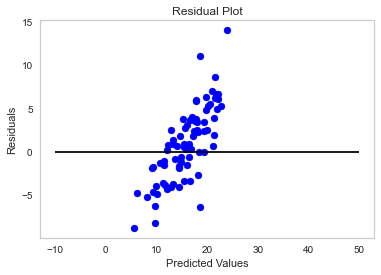

In [60]:
plt.scatter(y_pred, y_pred - y_test, color = 'blue')      
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                  
plt.grid()

plt.show() 

In [61]:
from sklearn.metrics import mean_squared_error

y_train_pred = clf.predict(X_train) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

MSE train data:  2.2460956507606515
MSE test data:  19.45111980353346


In [62]:
from sklearn.metrics import r2_score

print('r^2 train data: ', r2_score(y_train, y_train_pred))
print('r^2 test data: ', r2_score(y_test, y_pred))

r^2 train data:  0.7979775263049611
r^2 test data:  -1.4743344617283576


In [63]:
vocab = dict([(v, k) for k, v in vectorizer.vocabulary_.items()])

In [64]:
len(vocab)

484

In [65]:
import numpy as np
from pprint import pprint

def translate(vals):
    return list(map(lambda x: vocab[x], vals))

In [66]:
# 重みが小さい順
# このカードがあるほどゲーム終了が早い
translate(np.argsort(clf.coef_)[:10])

['silk-merchant',
 'banquet',
 'recruiter',
 'donate',
 'kings-court',
 'save',
 'alms',
 'villa',
 'seaway',
 'guildhall']

In [67]:
# 重みが大きい順
# このカードがあるほどゲーム終了が遅い
translate(np.argsort(clf.coef_)[::-1][:10])

['knights',
 'castles',
 'mountebank',
 'scrying-pool',
 'patrician',
 'coven',
 'cultist',
 'marauder',
 'shepherd',
 'ritual']

### 全データでも同じことをやる

In [69]:
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(' '))
X = vectorizer.fit_transform(all_df["supply"])
y = all_df["finish_turn"].astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

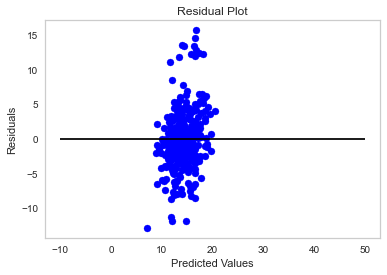

In [70]:
plt.scatter(y_pred, y_pred - y_test, color = 'blue')      
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black') 
plt.title('Residual Plot')                                
plt.xlabel('Predicted Values')                            
plt.ylabel('Residuals')                                  
plt.grid()

plt.show() 

In [72]:
y_train_pred = clf.predict(X_train)
print('MSE train data: ', mean_squared_error(y_train, y_train_pred))
print('MSE test data: ', mean_squared_error(y_test, y_pred))

MSE train data:  10.817950674164083
MSE test data:  18.453010183217945


In [73]:
print('r^2 train data: ', r2_score(y_train, y_train_pred))
print('r^2 test data: ', r2_score(y_test, y_pred))

r^2 train data:  0.30912114455221096
r^2 test data:  -0.03539868688082515


In [75]:
# 重みが小さい順
# このカードがあるほどゲーム終了が早い
translate(np.argsort(clf.coef_)[:10])

['donate',
 'colony',
 'governor',
 'seaway',
 'silk-merchant',
 'advance',
 'villa',
 'pixie',
 'way-of-the-mole',
 'alms']

In [76]:
# 重みが大きい順
# このカードがあるほどゲーム終了が遅い
translate(np.argsort(clf.coef_)[::-1][:10])

['mountebank',
 'sea-hag',
 'knights',
 'tax',
 'platinum',
 'museum',
 'haunted-woods',
 'cultist',
 'charm',
 'marauder']

結果はどれも納得...

# pycaretでガーッとやる

In [34]:
# 後々のためにを展開してdataframe化

count_vect_df = pd.DataFrame(X_train.todense(), columns=vectorizer.get_feature_names())
label_df = pd.DataFrame(y_train, columns=["finish_turn"])

train_df = pd.concat([count_vect_df, label_df.reset_index()], axis=1)

In [35]:
train_df

,,-teller,-traders,academy,acting-troupe,advance,advisor,alchemist,alliance,alms,...,wild-hunt,windfall,wine-merchant,witch,wolf-den,workers-village,workshop,young-witch,index,finish_turn
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,603,16.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,620,17.0
2,2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,42,15.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1441,22.5
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1122,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,371,14.0
693,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1316,16.0
694,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1593,12.5
695,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1519,12.0


In [36]:
# 後々のためにを展開してdataframe化

count_vect_df = pd.DataFrame(X_test.todense(), columns=vectorizer.get_feature_names())
label_df = pd.DataFrame(y_test, columns=["finish_turn"])

test_df = pd.concat([count_vect_df, label_df.reset_index()], axis=1)

In [37]:
from pycaret.regression import *

setup(data=train_df, target='finish_turn', session_id=1)

,Description,Value
0,session_id,1
1,Target,finish_turn
2,Original Data,"(697, 486)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,484
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(487, 480)"


([],
 False,
       index   _0   _1  _10  _11  _12   _2   _3   _4   _5  ...  werewolf_1  \
 582  1293.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...         0.0   
 479   888.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 604   896.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 349  2219.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...         0.0   
 134  2560.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 ..      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...         ...   
 439  1437.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 299  2179.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 575  1977.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 103   723.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 455  2114.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...         0.0   
 
      wharf_0  wild-hunt_1  windfall_1  wine-merc

In [38]:
best = compare_models(exclude=['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.6300,10.6456,3.2518,0.0961,0.1964,0.1778,0.0480
br,Bayesian Ridge,2.6089,10.7250,3.2623,0.0929,0.1973,0.1767,0.2610
rf,Random Forest Regressor,2.6357,10.8273,3.2761,0.0804,0.1982,0.1792,0.2910
huber,Huber Regressor,2.6546,11.4304,3.3682,0.0242,0.2030,0.1776,0.0340
ada,AdaBoost Regressor,2.8141,12.0449,3.4533,-0.0113,0.2113,0.1943,0.0400
dummy,Dummy Regressor,2.7896,12.0835,3.4583,-0.0132,0.2104,0.1905,0.0040
llar,Lasso Least Angle Regression,2.7896,12.0835,3.4583,-0.0132,0.2104,0.1905,0.0080
lasso,Lasso Regression,2.7969,12.1490,3.4677,-0.0188,0.2111,0.1911,0.0060
en,Elastic Net,2.7970,12.1495,3.4678,-0.0189,0.2111,0.1911,0.0050
ridge,Ridge Regression,2.8316,12.1744,3.4719,-0.0234,0.2105,0.1918,0.0100


In [40]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.6839,11.1047,3.3324,0.1641,0.1924,0.1689
1,2.5039,11.4665,3.3862,0.2092,0.2001,0.1729
2,2.8331,12.6326,3.5542,0.0134,0.2137,0.1940
3,2.4530,8.2185,2.8668,0.2593,0.1756,0.1640
4,2.6017,10.6411,3.2621,0.0537,0.1890,0.1677
5,2.3753,9.3636,3.0600,-0.0369,0.1727,0.1440
6,2.3364,8.3773,2.8944,0.0330,0.1788,0.1617
7,3.2860,14.2925,3.7805,0.1997,0.2363,0.2354
8,2.4657,10.2567,3.2026,0.0424,0.2028,0.1758
9,2.7607,10.1026,3.1785,0.0233,0.2024,0.1940


In [41]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.5715,10.6394,3.2618,0.1991,0.1869,0.1611
1,2.6482,12.1151,3.4807,0.1645,0.2079,0.1843
2,2.8116,12.3611,3.5158,0.0346,0.2109,0.1916
3,2.3805,8.1197,2.8495,0.2682,0.1752,0.1591
4,2.4275,9.5236,3.0860,0.1531,0.1787,0.1571
5,2.5519,10.7954,3.2856,-0.1954,0.1867,0.1574
6,2.2497,8.1408,2.8532,0.0603,0.1778,0.1572
7,3.0417,12.3546,3.5149,0.3082,0.2202,0.2158
8,2.5427,11.2548,3.3548,-0.0508,0.2116,0.1830
9,2.6794,9.6541,3.1071,0.0666,0.1980,0.1882


In [42]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8642,12.3031,3.5076,0.0739,0.2084,0.1878
1,3.0001,15.0181,3.8753,-0.0357,0.2322,0.2078
2,2.8456,13.3105,3.6484,-0.0395,0.2177,0.1948
3,2.6819,10.9339,3.3067,0.0146,0.2025,0.1809
4,2.5529,11.7694,3.4307,-0.0466,0.2015,0.1667
5,2.6683,11.0454,3.3235,-0.2231,0.1931,0.1654
6,2.2747,7.7364,2.7814,0.1070,0.1721,0.1561
7,3.8170,19.4596,4.4113,-0.0897,0.2737,0.2751
8,3.1025,14.5669,3.8167,-0.3600,0.2403,0.2178
9,3.1292,14.1114,3.7565,-0.3643,0.2332,0.2176


In [43]:
tuned_lightgbm = create_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2.8642,12.3031,3.5076,0.0739,0.2084,0.1878
1,3.0001,15.0181,3.8753,-0.0357,0.2322,0.2078
2,2.8456,13.3105,3.6484,-0.0395,0.2177,0.1948
3,2.6819,10.9339,3.3067,0.0146,0.2025,0.1809
4,2.5529,11.7694,3.4307,-0.0466,0.2015,0.1667
5,2.6683,11.0454,3.3235,-0.2231,0.1931,0.1654
6,2.2747,7.7364,2.7814,0.1070,0.1721,0.1561
7,3.8170,19.4596,4.4113,-0.0897,0.2737,0.2751
8,3.1025,14.5669,3.8167,-0.3600,0.2403,0.2178
9,3.1292,14.1114,3.7565,-0.3643,0.2332,0.2176


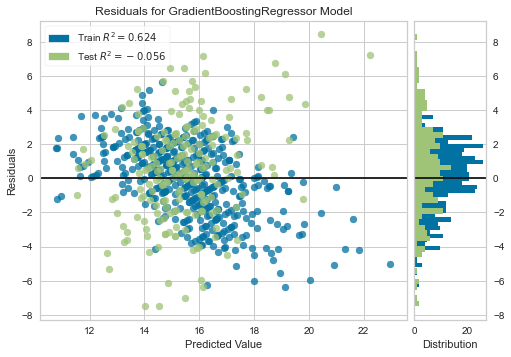

In [44]:
plot_model(tuned_gbr)

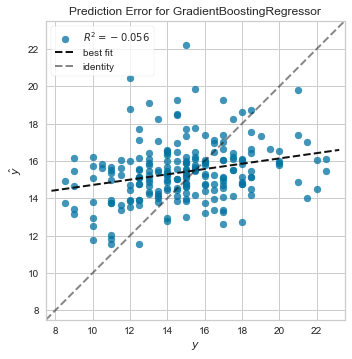

In [45]:
plot_model(tuned_gbr, plot = 'error')

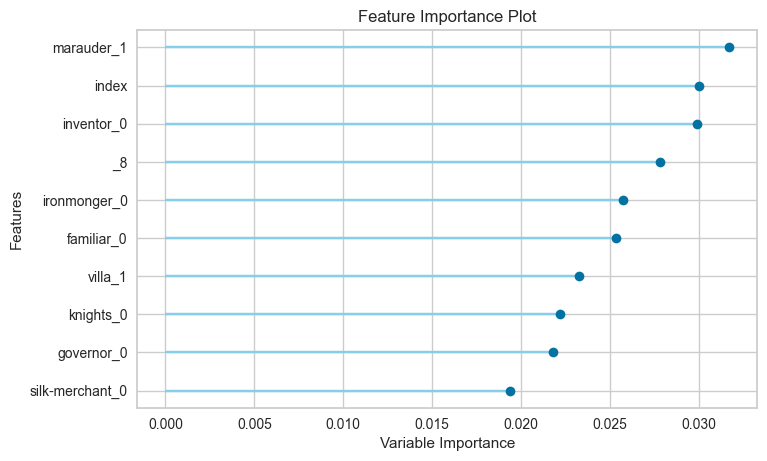

/Users/kazuki/.local/share/virtualenvs/dominion_end_turn_prediction-Lt_tFyb5/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kazuki/.local/share/virtualenvs/dominion_end_turn_prediction-Lt_tFyb5/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "
/Users/kazuki/.local/share/virtualenvs/dominion_end_turn_prediction-Lt_tFyb5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/kazuki/.local/share/virtualenvs/dominion_end_turn_prediction-Lt_tFyb5/lib/python3.8/site-packages/sklearn/utils

In [46]:
plot_model(tuned_gbr, plot='feature')

- importance, 結果の解釈が難しい
- plot_modelの結果を見る限り、めちゃめちゃoverfitしてそう。
  - やっぱりサプライというバリエーションに富んだものをデータ件数800弱でモデリングは無謀そう